# Cardio Good Fitness Project 


Version Control (for my references): v1.0

## 1. Objective
Preliminary Data Analysis. Explore the dataset and practice extracting basic observations about the data

### 1.1 Expectations
- Come up with a customer profile (characteristics of a customer) of the different products
- Perform uni-variate and multi-variate analyses
- Generate a set of insights and recommendations that will help the company in targeting new customers


### 1.2 Context
The data is for customers of the treadmill product(s) of a retail store called Cardio Good Fitness. It contains the following variables

**Product** - the model no. of the treadmill <br>
**Age** - in no of years, of the customer <br>
**Gender** - of the customer <br>
**Education** - in no. of years, of the customer <br>
**Marital Status** - of the customer <br>
**Usage** - Avg. # times the customer wants to use the treadmill every week <br>
**Fitness** - Self rated fitness score of the customer (5 - very fit, 1 - very unfit) <br>
**Income** - of the customer<br>
**Miles**- expected to run <br>
* Explore the dataset to identify differences between customers of each product. 
* You can also explore relationships between the different attributes of customers. 
* You can approach it from any other line of questioning that you feel could be relevant for the business.



### 1.3 Key questions to be answered
* What are the differences between customers for each product?
* What the different attributes for each bin of customer

## 2. Analysis of dataset  

### 2.1 Loading the libraries

In [7]:
import warnings
warnings.filterwarnings('ignore') #ignore those pesky warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
pd.set_option('display.float_format', lambda x: '%.5f' % x) # To supress numerical display in scientific notations

### 2.2 Import the dataset

In [8]:
#Load Dataset 
cardio_dataset = pd.read_csv('CardioGoodFitness.csv')

### 2.3 Check the dataset head()

In [21]:
# Exploring the dataset
cardio_dataset.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [22]:
cardio_dataset.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120
179,TM798,48,Male,18,Partnered,4,5,95508,180


### 2.4 Check the dataset shape()

In [23]:
# Exploring the dataset - length / shape
cardio_dataset.shape

(180, 9)

### 2.5 Check the dataset columns

In [24]:
cardio_dataset.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

### 2.6 Check the dataset describe()

In [20]:
cardio_dataset.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.00000,180.00000,180.00000,180.00000,180.00000,180.00000
mean,28.78889,15.57222,3.45556,3.31111,53719.57778,103.19444
std,6.94350,1.61705,1.08480,0.95887,16506.68423,51.86360
min,18.00000,12.00000,2.00000,1.00000,29562.00000,21.00000
25%,24.00000,14.00000,3.00000,3.00000,44058.75000,66.00000
50%,26.00000,16.00000,3.00000,3.00000,50596.50000,94.00000
75%,33.00000,16.00000,4.00000,4.00000,58668.00000,114.75000
max,50.00000,21.00000,7.00000,5.00000,104581.00000,360.00000


### 2.7 Check dataset info()

In [14]:
# Exploring the dataset - info
cardio_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [15]:
# Exploring the dataset: This function shows some basic descriptive statistics for all numeric columns
cardio_dataset.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.00000,180,180.00000,180,180.00000,180.00000,180.00000,180.00000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,TM195,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.78889,NaN,15.57222,NaN,3.45556,3.31111,53719.57778,103.19444
std,NaN,6.94350,NaN,1.61705,NaN,1.08480,0.95887,16506.68423,51.86360
min,NaN,18.00000,NaN,12.00000,NaN,2.00000,1.00000,29562.00000,21.00000
25%,NaN,24.00000,NaN,14.00000,NaN,3.00000,3.00000,44058.75000,66.00000
50%,NaN,26.00000,NaN,16.00000,NaN,3.00000,3.00000,50596.50000,94.00000
75%,NaN,33.00000,NaN,16.00000,NaN,4.00000,4.00000,58668.00000,114.75000


## Observations
1. Average age group of customers is 26 yrs with the youngest being 18 and the olders 50
2. It is interesting that most of the customers are Partnered relationshop
3. Average income of customers is ~50K with min 29K and max is 104K. It is quite a big spread of the earning power of the customers base

### 2.8 List / count the datatypes

In [25]:
cardio_dataset.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [26]:
cardio_dataset.dtypes.value_counts()

int64     6
object    3
dtype: int64

## Observations
1. Product, Gender, MaritalStatus are object data type. Note to self to change it to categorical
2. Age, Education, Usage, Fitness, Income, Miles are all int64 type - this is OK



### 2.9 Changing dtypes for object data types to category

In [56]:
# Changing product, gender, marital status for better processing

cardio_dataset.Product = cardio_dataset.Product.astype('category')
cardio_dataset.Gender = cardio_dataset.Gender.astype('category')
cardio_dataset.MaritalStatus = cardio_dataset.MaritalStatus.astype('category')

In [57]:
cardio_dataset.dtypes

Product          category
Age                 int64
Gender           category
Education           int64
MaritalStatus    category
Usage               int64
Fitness             int64
Income              int64
Miles               int64
dtype: object

In [58]:
cardio_dataset.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.00000,180.00000,180.00000,180.00000,180.00000,180.00000
mean,28.78889,15.57222,3.45556,3.31111,53719.57778,103.19444
std,6.94350,1.61705,1.08480,0.95887,16506.68423,51.86360
min,18.00000,12.00000,2.00000,1.00000,29562.00000,21.00000
25%,24.00000,14.00000,3.00000,3.00000,44058.75000,66.00000
50%,26.00000,16.00000,3.00000,3.00000,50596.50000,94.00000
75%,33.00000,16.00000,4.00000,4.00000,58668.00000,114.75000
max,50.00000,21.00000,7.00000,5.00000,104581.00000,360.00000


### 2.9 Checking missing values in dataset

In [37]:
cardio_dataset.isnull()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
175,False,False,False,False,False,False,False,False,False
176,False,False,False,False,False,False,False,False,False
177,False,False,False,False,False,False,False,False,False
178,False,False,False,False,False,False,False,False,False


In [38]:
cardio_dataset.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

## Observation
*The dataset doesn't have any null data*

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff20a8a7c10>,
      dtype=object)

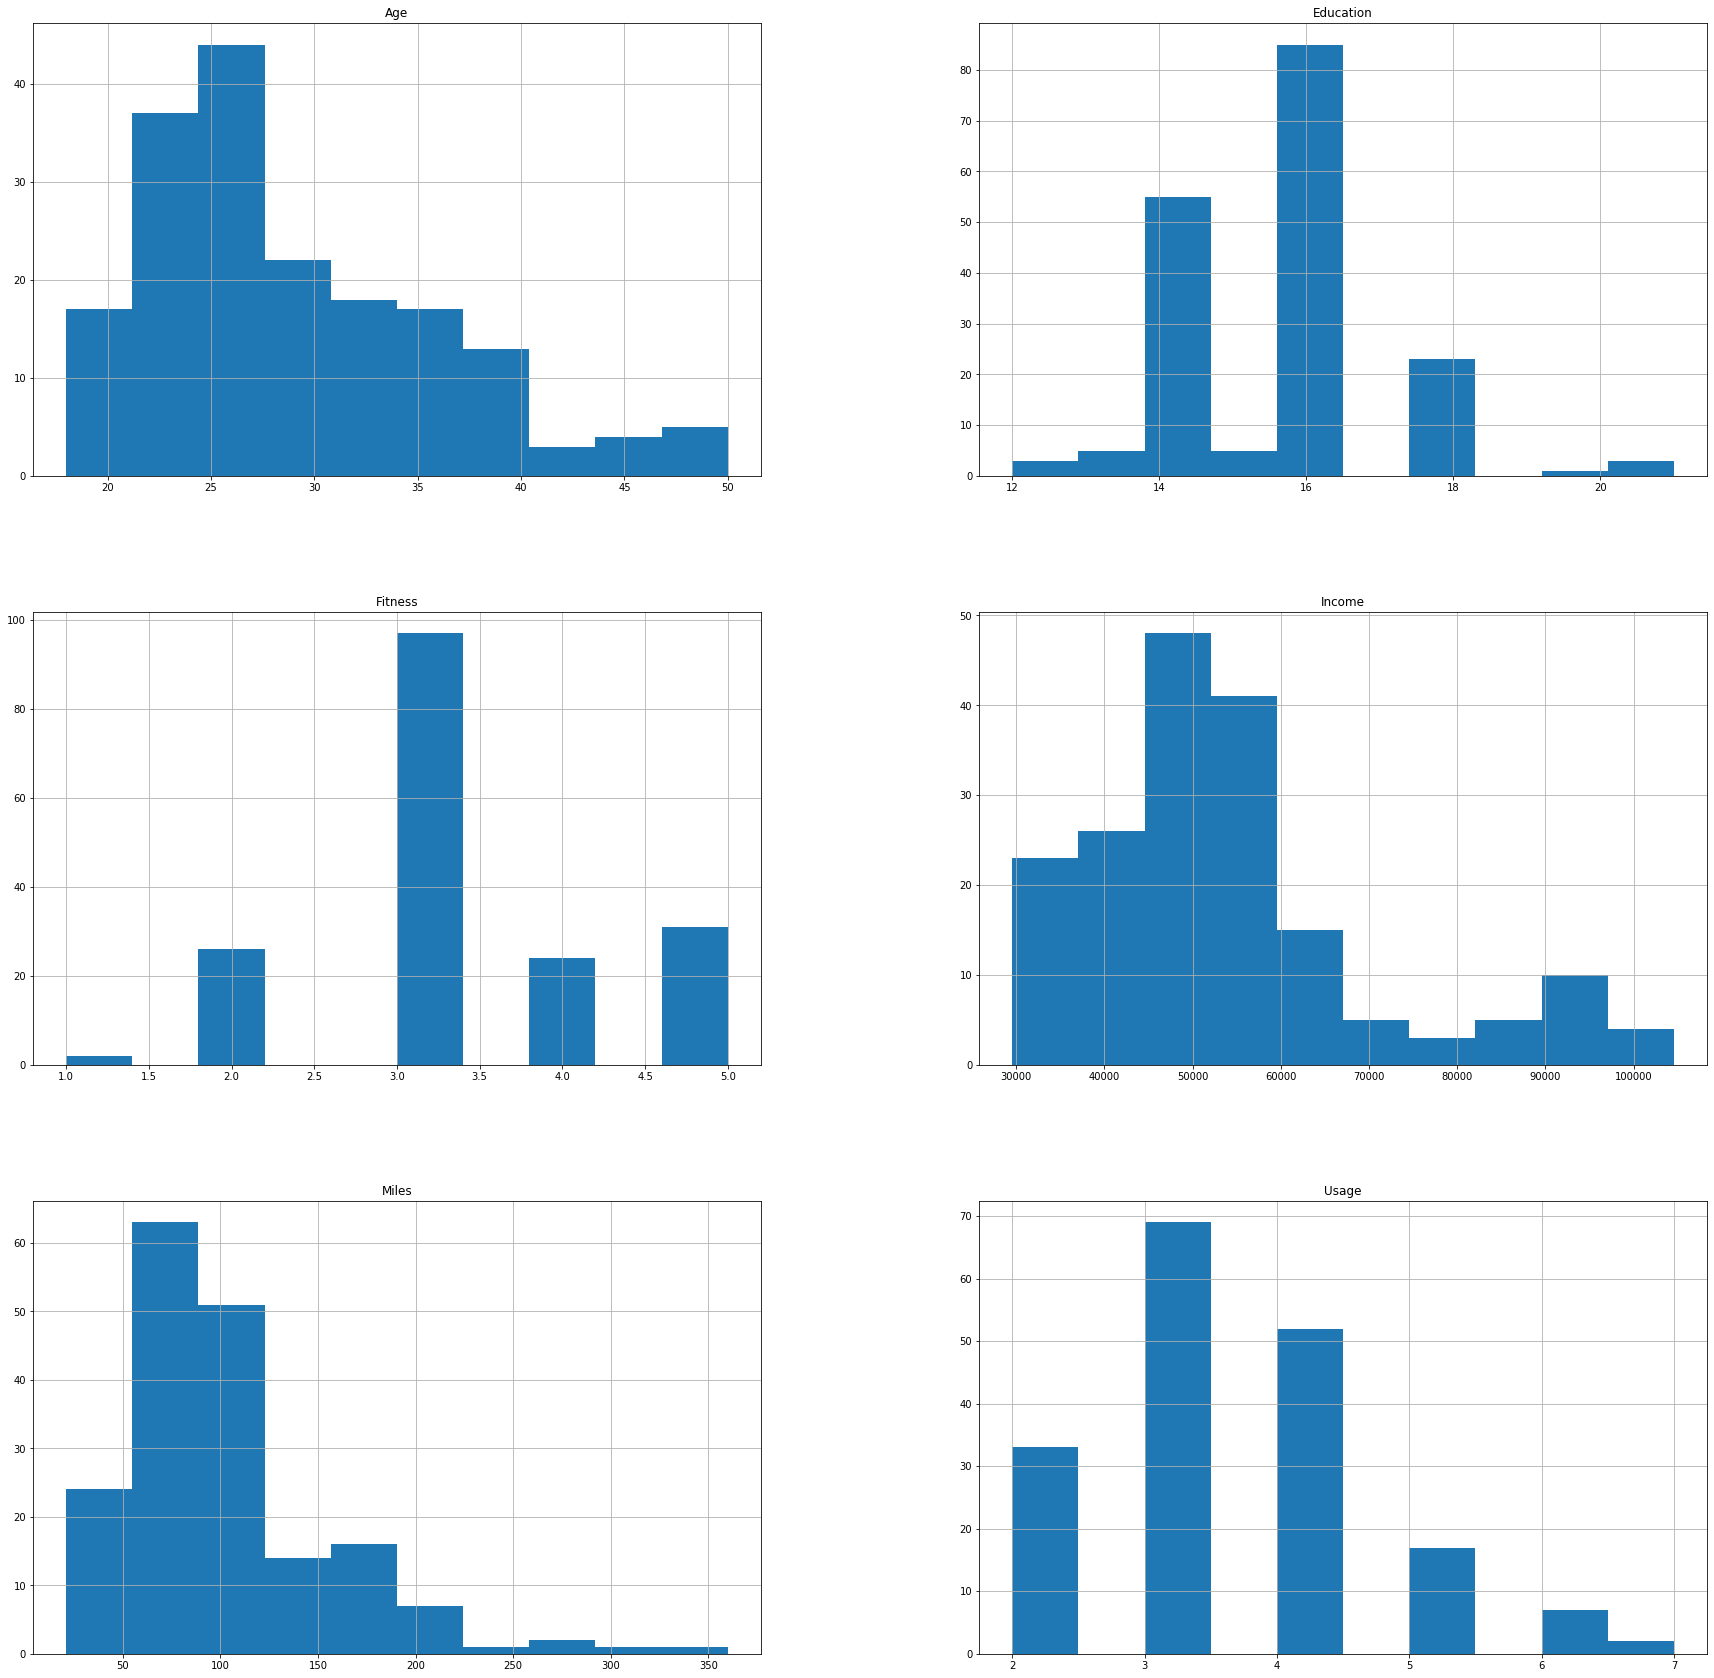

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

cardio_dataset.hist(figsize=(30,30))